### Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

### 데이터 불러오기 및 데이터 확인

In [1]:
# 데이터 불러오기
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print('train:',X_train.shape, y_train.shape)
print('test: ',X_test.shape, y_test.shape)

train: (60000, 28, 28) (60000,)
test:  (10000, 28, 28) (10000,)


#### 데이터 셋은 3차원, 데이터는 2차원  
(60000, 28,28) -> 데이터 셋에서 데이터 개수 60000, 데이터는 2차원(28, 28)  
흑백 데이터의 경우 channel이 1이므로 데이터 셋이 3차원

#### 데이터 셋은 4차원, 데이터는 3차원
(10000,28,28,3)  
-> 데이터 개수 10000, 데이터(28,28,3)  
-> (28,28,3) channel = 3 컬러 이미지

label:  7


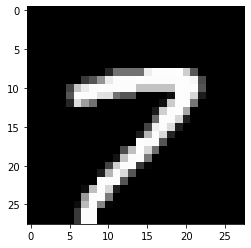

In [3]:
# 이미지 확인하기
from PIL import Image
import matplotlib.pyplot as plt
import cv2

plt.imshow(X_train[123], cmap =plt.cm.gray)
print('label: ', y_train[123])

In [4]:
# 이미지 데이터 확인하기
print(X_train[123])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38 113 113 113 114 23

### 이미지 데이터 전처리

In [5]:
X_train.shape #(데이터 전체의 개수, pixel)

(60000, 28, 28)

In [6]:
# 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟
def reshape_to_1d(df):
    return df.reshape(-1, df.shape[1]*df.shape[2]) # .reshape(전체데이터 개수, 데이터 pixel) (df.shape[0], -1)

In [7]:
X_train= reshape_to_1d(X_train)
X_test = reshape_to_1d(X_test)

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# 이미지 데이터 전처리 : Normalzation (MinMaxScaler -> 전체 범위는 동일함)
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
normalization.fit(X_train)

X_train_norm = normalization.transform(X_train)
X_test_norm = normalization.transform(X_test)

In [10]:
import pandas as pd
check_Train = pd.DataFrame(X_train.reshape(-1))
check_Train.describe()

,0
count,4.704000e+07
mean,3.331842e+01
std,7.856749e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550000e+02


In [11]:
check_Test = pd.DataFrame(X_test.reshape(-1))
check_Test.describe()

,0
count,7.840000e+06
mean,3.379122e+01
std,7.917247e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550000e+02


In [12]:

X_train = X_train/255 
X_test = X_test/255 

MinMaxScaler로 normalization을 했더니, X_test에서 max 값이 3으로 제대로 안되어 있는 것을 알 수 있음  
그러므로 0~255의 범위를 가졌으므로 255로 나눠서 normalization을 진행 

In [13]:
# 4. Label 전처리 (one-hot encoding) 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from keras.utils.np_utils import to_categorical   

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### MLP

In [16]:
# 패키지 불러오기
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
X_train.shape

(60000, 784)

In [18]:
y_train.shape

(60000, 10)

In [26]:
# 5. 모델 생성 : MLP
model = keras.Sequential()

model.add(Dense(512, input_dim = X_train.shape[1], activation = 'relu'))
#model.add(Dense(512, input_shape = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation = 'softmax'))

# 6. Compile - Optimizer, Loss function 설정
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',   patience = 15) 
# 베스트 모델 저장(.h5파일)
model_path = 'keras_house_model.h5'
model_checkpoint = ModelCheckpoint(filepath = model_path,
                                  monitor = 'val_loss')

# 7. 모델 학습시키기
batch_size = 64
epochs = 50
hist = model.fit(X_train, y_train,
                batch_size = batch_size,
                validation_split = 0.2,
                epochs = epochs,
                verbose = 1,
                callbacks = [early_stopping, model_checkpoint])

Epoch 1/50
750/750 [==============================] - 4s 4ms/step - loss: 0.4163 - accuracy: 0.8737 - val_loss: 0.1113 - val_accuracy: 0.9655
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0959 - accuracy: 0.9705 - val_loss: 0.0951 - val_accuracy: 0.9704
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.0872 - val_accuracy: 0.9742
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0936 - val_accuracy: 0.9747
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0877 - val_accuracy: 0.9766
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0303 - accuracy: 0.9900 - val_loss: 0.1050 - val_accuracy: 0.9712
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0851 - val_accuracy: 0.9782
Epoch 

In [27]:
# 8. 모델 평가하기
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9797


[0.11063675582408905, 0.9797000288963318]

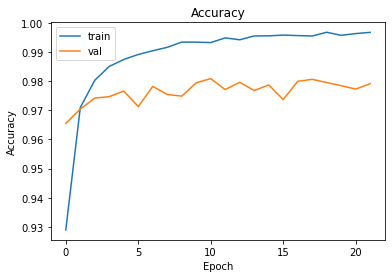

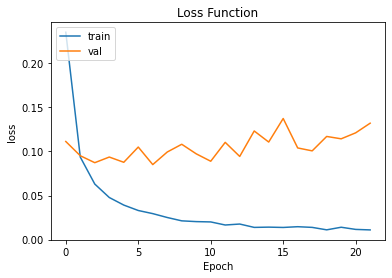

In [28]:
# 9. 학습 시각화하기
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.title('Accuracy')
plt.show()

# loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.title('Loss Function')
plt.show()

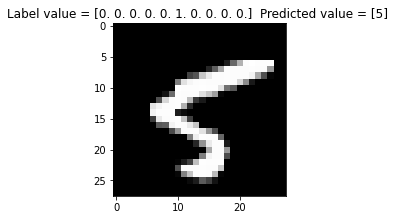

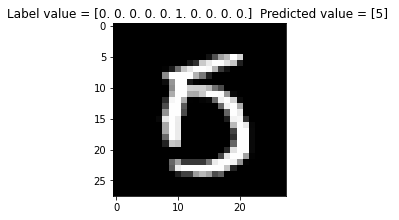

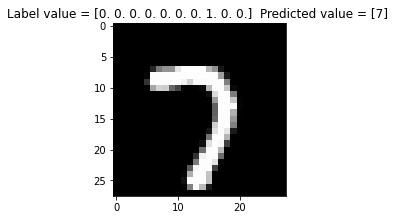

In [29]:
# 10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 784)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()